In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


dataLocation = r'car_prices.csv'
data = pd.read_csv(dataLocation)

data.info()
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


In [3]:
# Checking if there are any missing values/ nan values in our dataset
missing_values = data.isna().sum()

# Displayig mising values from each column
print(missing_values)


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [4]:
#removing all the missing values
data = data.dropna() 
print(f'record size of dataset after removing missing vallues: {data.shape[0]}')
#all the missing values have now been removed

record size of dataset after removing missing vallues: 472325


In [5]:
#checking for any duplicate values;
duplicate = data.drop_duplicates()
if(duplicate.shape[0] == data.shape[0]):
    print("Ther are no duplicate records")
else:
    print("there are duplicate records")
#we found no duplicate records.

Ther are no duplicate records


In [6]:
#working with column "Year"
year = data['year'].unique()
print(year)
#all the years seems to be valid

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1996 1995 1997 1994 1993 1992 1991 1990]


In [7]:
!pip install category_encoders
from category_encoders import BinaryEncoder
#working with column make
make = data['make'].unique()
print(make[:10])

#making sure to have all the characters of same case
data['make'] = data['make'].str.upper()
data['makeCopy'] = data['make']
encoder = BinaryEncoder(cols=['make'])
data = encoder.fit_transform(data)

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus']


In [8]:
#working with column model
make = data['model'].unique()
print(make[:10])

#making sure to have all the characters of same case
data['model'] = data['model'].str.upper()
data['modelCopy'] = data['model']
encoder = BinaryEncoder(cols=['model'])
data = encoder.fit_transform(data)

['Sorento' '3 Series' 'S60' '6 Series Gran Coupe' 'Altima' 'M5' 'Cruze'
 'A4' 'Camaro' 'A6']


In [9]:
#working with column trim
trim = data['trim'].unique()
print(trim)

#making sure to have all the characters of same case
data['trim'] = data['trim'].str.upper()
data['trimCopy'] = data['trim']
encoder = BinaryEncoder(cols=['trim'])
data = encoder.fit_transform(data)

['LX' '328i SULEV' 'T5' ... 'pure' 'EWB' 'Power Wagon']


In [10]:
data.describe()

,year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,...,trim_5,trim_6,trim_7,trim_8,trim_9,trim_10,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,...,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,0.052390,0.300848,0.344532,0.700090,0.569919,0.694355,0.014861,0.116924,0.441128,...,0.349503,0.326771,0.449087,0.490637,0.576415,0.466389,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,0.222812,0.458627,0.475216,0.458219,0.495088,0.460681,0.120995,0.321330,0.496523,...,0.476814,0.469033,0.497402,0.499913,0.494127,0.498870,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000,999999.000000,182000.000000,230000.000000


In [11]:
#now working with body column
body_mapping = { 'SUV': 'suv', 'Sedan': 'sedan', 'Convertible': 'convertible', 'Coupe': 'sedan', 'Wagon': 'wagon', 'Hatchback': 'hatchback', 'Crew Cab': 'pickup', 'G Coupe': 'sedan', 'G Sedan': 'sedan', 'Elantra Coupe': 'sedan', 'Genesis Coupe': 'sedan', 'Minivan': 'van', 'Van': 'van', 'Double Cab': 'pickup', 'CrewMax Cab': 'pickup', 'Access Cab': 'pickup', 'King Cab': 'pickup', 'CTS Coupe': 'sedan', 'SuperCrew': 'pickup', 'E-Series Van': 'van', 'Extended Cab': 'pickup', 'SuperCab': 'pickup', 'G Convertible': 'convertible', 'Koup': 'sedan', 'Regular Cab': 'pickup', 'Quad Cab': 'pickup', 'CTS-V Coupe': 'sedan', 'sedan': 'sedan', 'G37 Convertible': 'convertible', 'Club Cab': 'pickup', 'Xtracab': 'pickup', 'Q60 Convertible': 'convertible', 'CTS Wagon': 'wagon', 'G37 Coupe': 'sedan', 'Mega Cab': 'pickup', 'Cab Plus 4': 'pickup', 'Q60 Coupe': 'sedan', 'Beetle Convertible': 'convertible', 'TSX Sport Wagon': 'wagon', 'Promaster Cargo Van': 'van', 'Cab Plus': 'pickup', 'GranTurismo Convertible': 'convertible', 'CTS-V Wagon': 'wagon', 'Ram Van': 'van', 'convertible': 'convertible', 'minivan': 'van', 'Transit Van': 'van', 'van': 'van', 'regular-cab': 'pickup', 'suv': 'suv', 'g sedan': 'sedan', 'g coupe': 'sedan', 'hatchback': 'hatchback', 'king cab': 'pickup', 'supercrew': 'pickup', 'g convertible': 'convertible', 'coupe': 'sedan', 'crew cab': 'pickup', 'wagon': 'wagon', 'e-series van': 'van', 'regular cab': 'pickup', 'quad cab': 'pickup', 'g37 convertible': 'convertible', 'supercab': 'pickup', 'extended cab': 'pickup', 'crewmax cab': 'pickup', 'double cab': 'pickup', 'genesis coupe': 'sedan', 'access cab': 'pickup', 'mega cab': 'pickup', 'xtracab': 'pickup', 'beetle convertible': 'convertible', 'cts coupe': 'sedan', 'koup': 'sedan', 'club cab': 'pickup', 'elantra coupe': 'sedan', 'q60 coupe': 'sedan', 'cts-v coupe': 'sedan', 'transit van': 'van', 'granturismo convertible': 'convertible', 'tsx sport wagon': 'wagon', 'promaster cargo van': 'van', 'q60 convertible': 'convertible', 'cab plus 4': 'pickup', 'cts wagon': 'wagon' } 
data['body'] = data['body'].str.lower().map(body_mapping).fillna('Other')
data['bodyCopy'] = data['body']
encoder = BinaryEncoder(cols=['body'])
data = encoder.fit_transform(data)
#now all the body tips are either 'suv' 'sedan' 'convertible' 'wagon' 'hatchback' 'Other' 'van'

In [12]:
#now working with transmission:
from sklearn.preprocessing import LabelEncoder

data['transmission'] = LabelEncoder().fit_transform(data['transmission'])


In [13]:
#vin does not have any relevance with the price so droping vin
data = data.drop('vin', axis=1)
data = data.drop('state', axis= 1)
# also droping of the features irrelevant to price
data = data.drop(['color', 'interior', 'seller', 'saledate'], axis=1)



In [14]:
data.describe()

,year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,...,trim_10,body_0,body_1,body_2,body_3,transmission,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,...,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,0.052390,0.300848,0.344532,0.700090,0.569919,0.694355,0.014861,0.116924,0.441128,...,0.466389,0.000034,0.222745,0.663226,0.383564,0.034641,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,0.222812,0.458627,0.475216,0.458219,0.495088,0.460681,0.120995,0.321330,0.496523,...,0.498870,0.005820,0.416089,0.472608,0.486254,0.182870,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000,999999.000000,182000.000000,230000.000000


In [15]:
data.describe()

,year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,...,trim_10,body_0,body_1,body_2,body_3,transmission,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,...,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,0.052390,0.300848,0.344532,0.700090,0.569919,0.694355,0.014861,0.116924,0.441128,...,0.466389,0.000034,0.222745,0.663226,0.383564,0.034641,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,0.222812,0.458627,0.475216,0.458219,0.495088,0.460681,0.120995,0.321330,0.496523,...,0.498870,0.005820,0.416089,0.472608,0.486254,0.182870,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000,999999.000000,182000.000000,230000.000000


               make_encoded  model_encoded  trim_encoded  body_encoded  \
make_encoded       1.000000       0.385390      0.104314      0.103738   
model_encoded      0.385390       1.000000      0.136040      0.111784   
trim_encoded       0.104314       0.136040      1.000000      0.089065   
body_encoded       0.103738       0.111784      0.089065      1.000000   
sellingprice      -0.087475      -0.104363      0.049045     -0.037240   

               sellingprice  
make_encoded      -0.087475  
model_encoded     -0.104363  
trim_encoded       0.049045  
body_encoded      -0.037240  
sellingprice       1.000000  


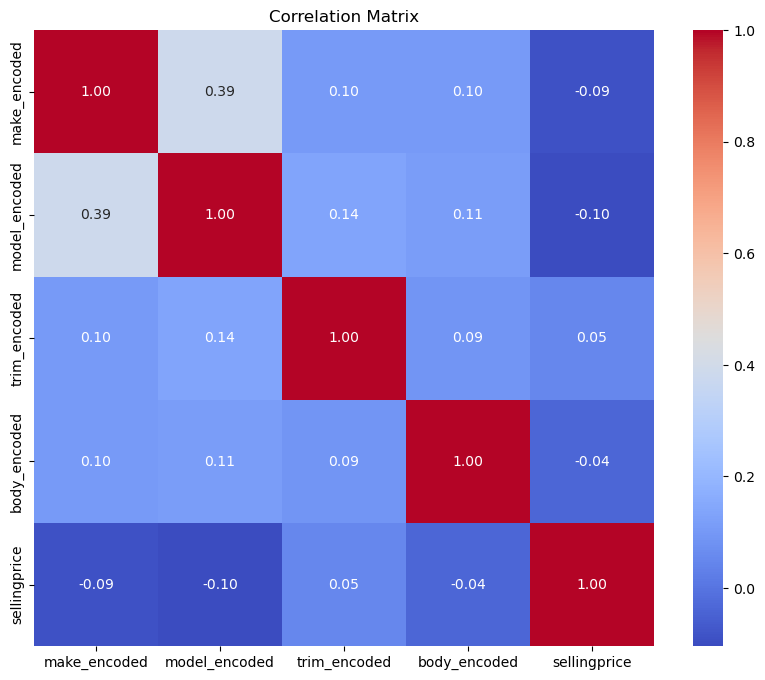

In [16]:
numeric_data = data.select_dtypes(include=['int64', 'float64', 'int32'])

combine = pd.DataFrame()
# having a seperate dataset to combine all the columns of each feature
combine['make_combined'] = data[['make_0', 'make_1', 'make_2', 'make_3', 'make_4', 'make_5']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
combine['model_combined'] = data[['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
combine['trim_combined'] = data[['trim_0', 'trim_1', 'trim_2', 'trim_3', 'trim_4', 'trim_5', 'trim_6', 'trim_7', 'trim_8', 'trim_9', 'trim_10']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
combine['body_combined'] = data[['body_0', 'body_1', 'body_2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

label_encoder_make = LabelEncoder()
label_encoder_model = LabelEncoder()
label_encoder_trim = LabelEncoder()
label_encoder_body = LabelEncoder()

# adding the conbined data to data in numermical form
data['make_encoded'] = label_encoder_make.fit_transform(combine['make_combined'])
data['model_encoded'] = label_encoder_model.fit_transform(combine['model_combined'])
data['trim_encoded'] = label_encoder_trim.fit_transform(combine['trim_combined'])
data['body_encoded'] = label_encoder_body.fit_transform(combine['body_combined'])


selected_features = data[['make_encoded', 'model_encoded', 'trim_encoded', 'body_encoded', 'sellingprice']]

# createing the corelation matrix
correlation_matrix = selected_features.corr()
print(correlation_matrix)

# plotting the heat maap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [19]:
# From this correlation matrix, we can glean several insights about the relationships between the encoded features (make_encoded, model_encoded, trim_encoded, body_encoded) and the target variable (sellingprice).

# Key Points:
# Diagonal Values:

# The diagonal values are all 1.000000, indicating that each feature is perfectly correlated with itself.

# Correlation Among Features:

# make_encoded and model_encoded have a moderate positive correlation (0.385390). This suggests that certain makes are associated with specific models.

# make_encoded and body_encoded show a low positive correlation (0.122196), indicating some relationship between car make and body type.

# model_encoded and trim_encoded have a low positive correlation (0.136040), which indicates a slight association between car model and trim level.

# trim_encoded and body_encoded are weakly correlated (0.100101), showing minimal association between trim and body type.

# Correlation with Selling Price:

# make_encoded (-0.087475): Weak negative correlation with selling price, suggesting that the make of the car has a minimal negative impact on price.

# model_encoded (-0.104363): Weak negative correlation with selling price, indicating a slightly stronger negative influence of the model on price than the make.

# trim_encoded (0.049045): Very weak positive correlation with selling price, suggesting trim level has a minimal positive impact on price.

# body_encoded (-0.013055): Very weak negative correlation with selling price, showing an almost negligible impact of body type on price.

# Summary:
# Overall, the correlations between the individual features (make, model, trim, body) and the selling price are weak, indicating that none of these features alone are strong predictors of the selling price. The relationships among the features themselves are also relatively weak to moderate. This implies that a combination of features or additional data may be necessary to more accurately predict the selling price.

# If you have any further questions or need help with other aspects of your analysis, just let me know!

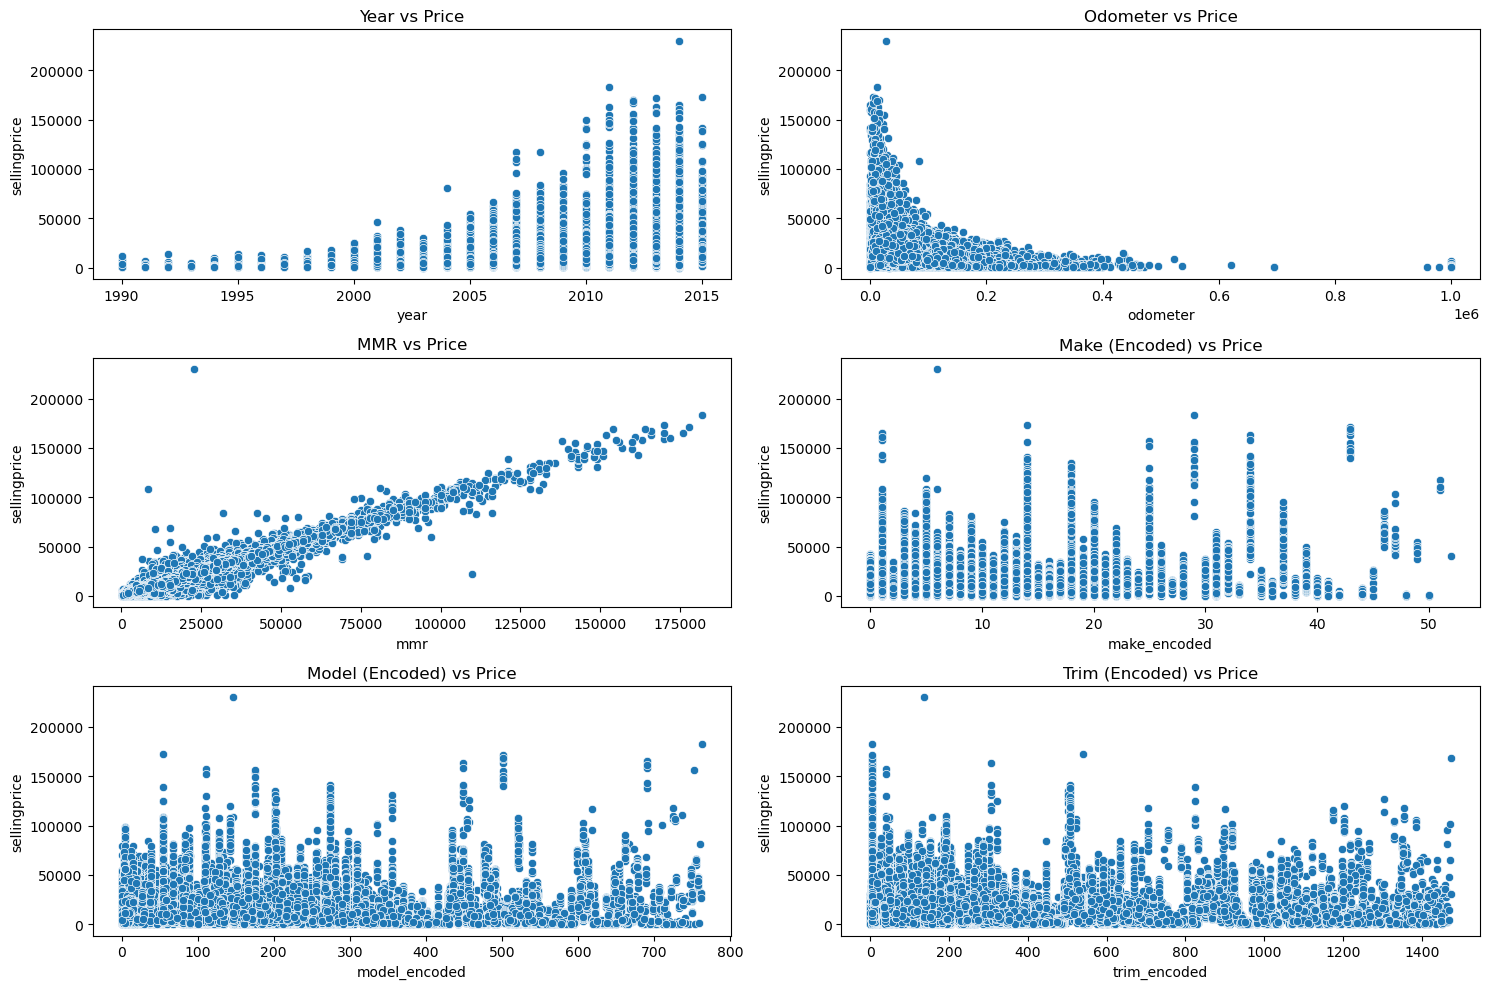

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.scatterplot(x=data['year'], y=data['sellingprice'])
plt.title("Year vs Price")

plt.subplot(3, 2, 2)
sns.scatterplot(x=data['odometer'], y=data['sellingprice'])
plt.title("Odometer vs Price")

plt.subplot(3, 2, 3)
sns.scatterplot(x=data['mmr'], y=data['sellingprice'])
plt.title("MMR vs Price")

plt.subplot(3, 2, 4)
sns.scatterplot(x=data['make_encoded'], y=data['sellingprice'])
plt.title("Make (Encoded) vs Price")

plt.subplot(3, 2, 5)
sns.scatterplot(x=data['model_encoded'], y=data['sellingprice'])
plt.title("Model (Encoded) vs Price")

plt.subplot(3, 2, 6)
sns.scatterplot(x=data['trim_encoded'], y=data['sellingprice'])
plt.title("Trim (Encoded) vs Price")

plt.tight_layout()
plt.show()


In [21]:
# Year vs. Selling Price:

# Observation: Newer cars generally tend to have higher selling prices. This plot shows a positive trend where the selling price increases with the year of the car.

# Odometer vs. Selling Price:

# Observation: Cars with lower mileage (odometer reading) tend to sell for higher prices. There's a noticeable downward trend indicating that higher mileage reduces the car's selling price.

# MMR vs. Selling Price:

# Observation: There is a strong positive correlation between the Manheim Market Report (MMR) value and the selling price. Higher MMR values are associated with higher selling prices.

# Make (Encoded) vs. Selling Price:

# Observation: The make of the car, represented as encoded categories, shows a wide range of selling prices across different makes. Some makes may have higher average prices, but there's considerable variability.

# Model (Encoded) vs. Selling Price:

# Observation: Similar to the make, the car model also shows a wide distribution of selling prices. Certain models might influence the price more than others, but the scatter suggests a high variability.

# Trim (Encoded) vs. Selling Price:

# Observation: The trim levels, encoded into numerical values, also show variability in selling prices. Some trims might command higher prices, but there's no clear trend visible from the plot.

# Overall Interpretation:
# General Trends: Newer cars and those with lower mileage are priced higher. The MMR value is a strong predictor of the selling price, reflecting the market valuation.

# Variability in Categorical Features: The encoded categorical features (make, model, trim) show a lot of variability in their relationship with the selling price, indicating that other factors might also be at play.

C:\Users\meetf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


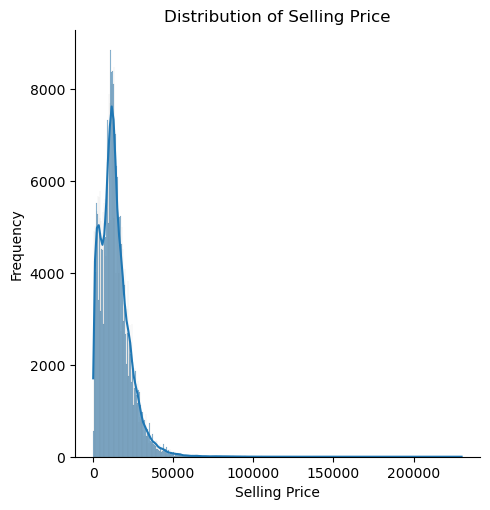

In [22]:
# let us check the distribution of selling price and check for any outliers
sns.displot(data['sellingprice'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [23]:
# we can see that the problem lies with the price the price we have in data is not linerar
#common approach to transform the data is log transformation.
logPrice = np.log(data['sellingprice'])
data['logPrice']= logPrice

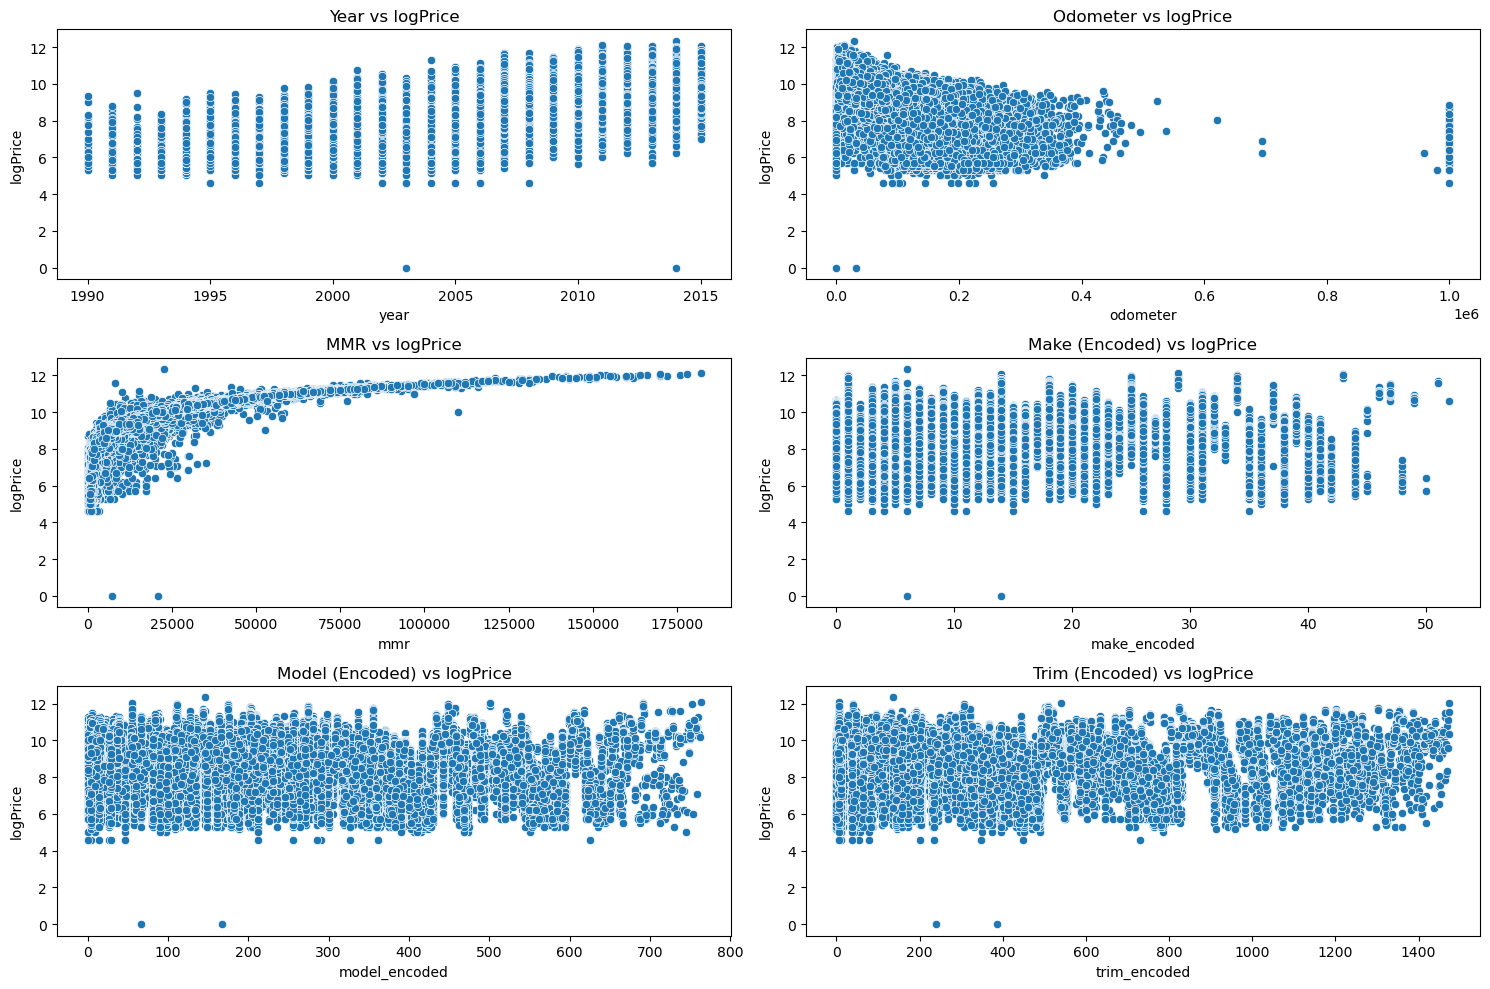

In [24]:
# reploting the graphs
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.scatterplot(x=data['year'], y=data['logPrice'])
plt.title("Year vs logPrice")

plt.subplot(3, 2, 2)
sns.scatterplot(x=data['odometer'], y=data['logPrice'])
plt.title("Odometer vs logPrice")

plt.subplot(3, 2, 3)
sns.scatterplot(x=data['mmr'], y=data['logPrice'])
plt.title("MMR vs logPrice")

plt.subplot(3, 2, 4)
sns.scatterplot(x=data['make_encoded'], y=data['logPrice'])
plt.title("Make (Encoded) vs logPrice")

plt.subplot(3, 2, 5)
sns.scatterplot(x=data['model_encoded'], y=data['logPrice'])
plt.title("Model (Encoded) vs logPrice")

plt.subplot(3, 2, 6)
sns.scatterplot(x=data['trim_encoded'], y=data['logPrice'])
plt.title("Trim (Encoded) vs logPrice")

plt.tight_layout()
plt.show()

In [25]:
data.describe()


,year,make_0,make_1,make_2,make_3,make_4,make_5,model_0,model_1,model_2,...,transmission,condition,odometer,mmr,sellingprice,make_encoded,model_encoded,trim_encoded,body_encoded,logPrice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,...,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,0.052390,0.300848,0.344532,0.700090,0.569919,0.694355,0.014861,0.116924,0.441128,...,0.034641,30.774177,66701.732040,13837.058964,13690.512058,12.880847,144.778462,128.507583,1.108851,9.230075
std,3.822151,0.222812,0.458627,0.475216,0.458219,0.495088,0.460681,0.120995,0.321330,0.496523,...,0.182870,13.286866,51939.586894,9532.229273,9613.033738,10.342535,116.878611,182.559944,0.945338,0.889798
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,24.000000,28137.000000,7425.000000,7200.000000,4.000000,54.000000,10.000000,0.000000,8.881836
50%,2012.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,35.000000,51085.000000,12300.000000,12200.000000,9.000000,146.000000,61.000000,1.000000,9.409191
75%,2013.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,41.000000,96590.000000,18300.000000,18200.000000,22.000000,185.000000,157.000000,1.000000,9.809177
max,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,49.000000,999999.000000,182000.000000,230000.000000,52.000000,763.000000,1474.000000,4.000000,12.345835


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           472325 non-null  int64  
 1   make_0         472325 non-null  int64  
 2   make_1         472325 non-null  int64  
 3   make_2         472325 non-null  int64  
 4   make_3         472325 non-null  int64  
 5   make_4         472325 non-null  int64  
 6   make_5         472325 non-null  int64  
 7   model_0        472325 non-null  int64  
 8   model_1        472325 non-null  int64  
 9   model_2        472325 non-null  int64  
 10  model_3        472325 non-null  int64  
 11  model_4        472325 non-null  int64  
 12  model_5        472325 non-null  int64  
 13  model_6        472325 non-null  int64  
 14  model_7        472325 non-null  int64  
 15  model_8        472325 non-null  int64  
 16  model_9        472325 non-null  int64  
 17  trim_0         472325 non-null  in

In [32]:
import os 
# lets save where the notebook is present
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
print(notebook_dir)
# we get the full path and save it 
save = os.path.join(notebook_dir, 'cleaned_data.csv')

# saving the data to the file
data.to_csv(save, index=False)
print("File has been created")


C:\Users\meetf\Downloads\apna college\datamingn\group
File has been created


In [33]:
#from the same path that we described before we read teh new cleaned data file
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
read_path = os.path.join(notebook_dir, 'cleaned_data.csv')

# save it to data variable
data = pd.read_csv(read_path)


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scratch_linear_regression import ScratchLinearRegression
import pickle

# running the algorrithm
if __name__ == "__main__":
    # diving the data to feature and target by x and y respectively
    X = data[['year', 'make_encoded', 'model_encoded', 'trim_encoded', 'body_encoded', 'transmission', 'condition', 'odometer', 'mmr']].values
    y = data['sellingprice'].values

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # we standardize the featuers
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creating and training the custom linear regression model
    model = ScratchLinearRegression()
    model.fit(X_train_scaled, y_train)

    # Save the model and scaler to the 'models' directory
    os.makedirs('models', exist_ok=True)

    with open('models/linearModel.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    with open('models/linerScaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

    print("Model has been saved!")


Model has been saved!


In [84]:
from scratch_ridge_regression import ScratchRidgeRegression


# Running the algorithm
if __name__ == "__main__":
    # Dividing the data into features and target by X and y respectively
    X = data[['year', 'make_encoded', 'model_encoded', 'trim_encoded', 'body_encoded', 'transmission', 'condition', 'odometer', 'mmr']].values
    y = data['sellingprice'].values

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # We standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creating and training the custom ridge regression model
    alpha = 2.5  # Regularization strength
    model = ScratchRidgeRegression(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    # Save the model and scaler to the 'models' directory
    os.makedirs('models', exist_ok=True)

    with open('models/ridgeModel.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    with open('models/ridgeScaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

    print("Model has been saved!")


Model has been saved!


In [80]:
from scratch_polynomial_regression import ScratchPolynomialRegression


# Running the algorithm
if __name__ == "__main__":
    # Dividing the data into features and target by X and y respectively
    X = data[['year', 'make_encoded', 'model_encoded', 'trim_encoded', 'body_encoded', 'transmission', 'condition', 'odometer', 'mmr']].values
    y = data['sellingprice'].values

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creating and training the custom polynomial regression model
    degree = 2  # giving teh degree of polynomial
    model = ScratchPolynomialRegression(degree=degree)
    model.fit(X_train_scaled, y_train)

    # Save the model and scaler to the 'models' directory
    os.makedirs('models', exist_ok=True)

    with open('models/polynomialModel.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    with open('models/polynomialScaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

    print("Model has been saved!")


Model has been saved!


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1039.7607912017402
Mean Squared Error: 2631504.4928750717
R-squared: 0.9710473582803155


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_score = np.mean(-scores) 
print(f'Cross-Validated Mean Squared Error: {mean_score}')


Cross-Validated Mean Squared Error: 2844214.3595023514


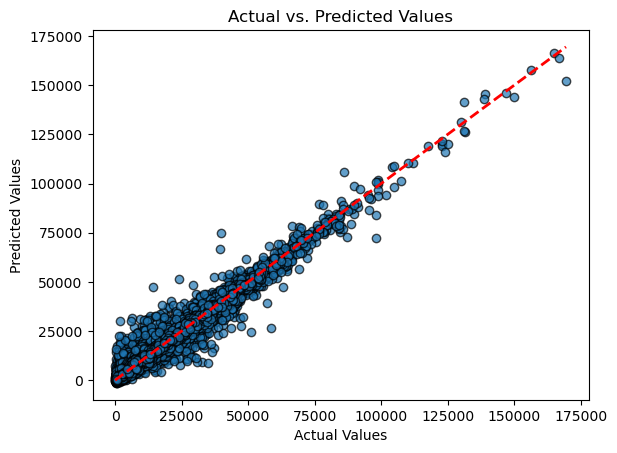

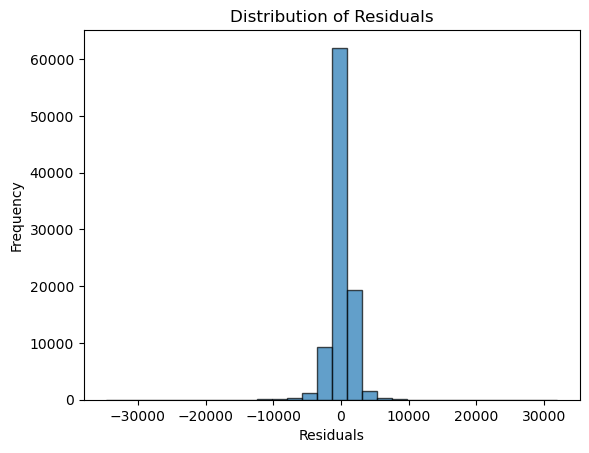

In [87]:
import matplotlib.pyplot as plt

# Plotting predictions vs. actual values
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [88]:
data['trim_encoded'].unique()

array([   0,    1,    2, ..., 1472, 1473, 1474], dtype=int64)

In [89]:
data['trimCopy'].nunique()

1475

In [90]:
# Extract the actual car makes and their corresponding encoded values
make_actual = data['makeCopy']
make_encoded = data['make_encoded']
model_actual = data['modelCopy']
model_encoded = data['model_encoded']
trim_actual = data['trimCopy']
trim_encoded = data['trim_encoded']
body_actual = data['bodyCopy']
body_encoded = data['body_encoded']

model_dict = dict(zip(model_actual, model_encoded))
trim_dict = dict(zip(trim_actual, trim_encoded))
body_dict = dict(zip(body_actual, body_encoded))
make_dict = dict(zip(make_actual, make_encoded))


transmission_dict = { 'automatic': 0, 'manual': 1}

# Save dictionaries to files
with open('make_dict.pkl', 'wb') as file:
    pickle.dump(make_dict, file)
with open('model_dict.pkl', 'wb') as file:
    pickle.dump(model_dict, file)
with open('trim_dict.pkl', 'wb') as file:
    pickle.dump(trim_dict, file)
with open('body_dict.pkl', 'wb') as file:
    pickle.dump(body_dict, file)
with open('transmission_dict.pkl', 'wb') as file:
    pickle.dump(transmission_dict, file)

print("Dictionaries have been saved!")


Dictionaries have been saved!
